<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/13_BERT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏åÏôÄ Colab Ïó∞Îèô

In [ ]:
#HuggingFaceÎäî ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ïù∏Í≥µÏßÄÎä• Î™®Îç∏ÏóêÏÑú, BERT Î™®Îç∏ Í∞ôÏùÄ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Îì§ÏùÑ ÏâΩÍ≤å Îã§Î£∞ Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî Ìå®ÌÇ§ÏßÄÏûÑ
!pip install transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.2/7.2 MB 47.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 236.8/236.8 kB 22.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 101.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 66.7 MB/s eta 0:00:00


In [ ]:
!pip install neattext

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.7/114.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import spacy
import re
import nltk
import string
import sklearn
import neattext as nt
import neattext.functions as nfx
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path1 = '/content/drive/My Drive/bert/newdata0627.csv'
df = pd.read_csv(file_path1)

In [ ]:
df.rename(columns={'text': 'Text'}, inplace=True)

In [ ]:
df.head()

Text  oh_label
0  Ain't nothing that good head or pussy that cur...         1
1  @user @user Seemed bona fide to me when I did ...         0
2  @user @user @user @user @user @user @user @use...         0
3  @USER RODRICK ISN'T EVEN THAT BAD IS THE THING...         1
4  Pretty sure I got ya bitch nudes in my phone n...         1

In [ ]:
df['oh_label'].value_counts()

1    42045
0    42045
Name: oh_label, dtype: int64

In [ ]:
# Îç∞Ïù¥ÌÑ∞ 1 ÏπºÎüº Î∂àÌïÑÏöî ÌïúÍ±∞ ÏóÜÏï†Í∏∞
df.isnull().sum()

Text        0
oh_label    0
dtype: int64

In [ ]:
print(df.isnull())

        Text  oh_label
0      False     False
1      False     False
2      False     False
3      False     False
4      False     False
...      ...       ...
84085  False     False
84086  False     False
84087  False     False
84088  False     False
84089  False     False

[84090 rows x 2 columns]


In [ ]:

from html import unescape
# Preprocess text function
def preprocess_text(text):
    # 1. Find #[xX]?\w+; and put '&' to the first
    text = re.sub(r'(^|\D)#\w+;', lambda match: f'&{match.group()}' if match.group().startswith('#') else f'{match.group()[0]}&{match.group()[1:]}', text)
    # 2. Convert HTML character to unicode
    text = unescape(text)
    # 3. Remove http, https
    text = re.sub(r'http\S+|https\S+', '', text)
    # 4. Remove email
    text = re.sub(r'\S+@\S+', '', text)
    # 5. Remove twitter id
    text = re.sub(r'@\w+', '', text)
    # 6. Remove "&lt;/b&gt;"
    text = re.sub(r'&lt;/b&gt;', '', text)
    # 7. Remove &quot; and quot;
    text = re.sub(r'&quot;|quot;', '', text)
    # 8. Replace &amp; and amp; with &
    text = re.sub(r'&amp;|amp;', '&', text)
    # 9. Replace &lt; and lt; with <
    text = re.sub(r'&lt;|lt;', '<', text)
    # 10. Replace &gt; and gt; with >
    text = re.sub(r'&gt;|gt;', '>', text)
    # 11. Remove the text inside parentheses
    text = re.sub(r'\(.*?\)', '', text)
    # 12. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # 13. Remove #
    text = re.sub(r'#[\w]*', '', text)
    # Remove user handles
    text = re.sub(r'@\w+', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

In [ ]:
df['Text'] = df['Text'].apply(preprocess_text)

In [ ]:
df['Text'] = df['Text'].apply(nfx.remove_stopwords)
df.tail()

Text  oh_label
84085  read aicle 4 yrs dhabas national highways grow...         0
84086                                    thankful paner.         0
84087               playing : sophie hutchings - " most"         0
84088  Liberals steamrolling Parliament proper debate...         1
84089                                           wish go!         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      84090 non-null  object
 1   oh_label  84090 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
'''
from transformers import RobertaConfig, RobertaForSequenceClassification

# Î°úÎìúÌïòÎ†§Îäî Î™®Îç∏Ïùò Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
model_path = '/content/drive/My Drive/bert/roberta_ver5'

# Ïù¥Ï†ÑÏóê Ï†ÄÏû•Ìïú Î™®Îç∏Ïùò ÏÑ§Ï†ïÏùÑ Î°úÎìúÌï©ÎãàÎã§.
config = RobertaConfig.from_pretrained(model_path)

# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§.
model = RobertaForSequenceClassification.from_pretrained(model_path, config=config)

# ÌïÑÏöîÌïú Í≤ΩÏö∞, Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† ÎîîÎ∞îÏù¥Ïä§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§.
model.to(device)


In [ ]:
#ÌÖåÏä§Ìä∏ ÌïòÎäîÍ±∞ ÎÅåÏñ¥Ïò®Í±∞ Ï∞∏Ï°∞
'''from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
import torch
from torch.utils.data import DataLoader
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("your_new_dataset.csv")

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Í∏∞Ï°¥ ÏΩîÎìú Ï∞∏Í≥†)
df['oh_label'] = [get_onehot_label(label) for label in df['label']] # get_onehot_label: ÎùºÎ≤®ÏùÑ ÏõêÌï´ Ïù∏ÏΩîÎî©ÌïòÎäî Ìï®Ïàò

# Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
labels = torch.tensor(df['oh_label'].tolist())
input_ids = torch.tensor(df['input_ids'].tolist())
attention_masks = torch.tensor(df['attention_mask'].tolist())

# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
dataset = TensorDataset(input_ids, attention_masks, labels)

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏôÄ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('/content/drive/My Drive/bert/roberta_ver5', num_labels=NUM_LABELS)

# Device ÏÑ§Ï†ï
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Ïù¥ÌõÑÏóêÎäî Í∏∞Ï°¥Ïóê ÌõàÎ†® ÏΩîÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§Ïãú ÌõàÎ†®ÌïòÍ±∞ÎÇò ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌï©ÎãàÎã§.


## Train, Test set ÎÇòÎàÑÍ∏∞

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Training set size: 58863
Validation set size: 12613
Test set size: 12614


In [ ]:
df['oh_label'].value_counts()

1    42045
0    42045
Name: oh_label, dtype: int64

In [ ]:
df_test['oh_label'].value_counts()

1    6338
0    6276
Name: oh_label, dtype: int64

In [ ]:
df_train['oh_label'].value_counts()

0    29465
1    29398
Name: oh_label, dtype: int64

In [ ]:
df_val['oh_label'].value_counts()

1    6309
0    6304
Name: oh_label, dtype: int64

## 4. Î≤ÑÌä∏ Ïù∏Ìíã ÎßåÎì§Í∏∞


ÌÜ†ÌÅ∞Ìôî ÌôïÏù∏

In [ ]:
from transformers import TFAutoModel, AutoTokenizer
import tensorflow as tf
import numpy as np
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained('bert-large-cased')
import random

random_index = random.choice(df.index.tolist())
random_row = df.loc[random_index]

# ÏÑ†ÌÉùÌïú ÌñâÏùò ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌï©ÎãàÎã§
text = random_row['Text']
tokens = tokenizer.tokenize(text)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")

Original Text: beautiful princess mummy
Tokens: ['beautiful', 'princess', 'mum', '##my']


In [ ]:
from transformers import TFAutoModel, AutoTokenizer
import tensorflow as tf
import numpy as np
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained('bert-large-cased')

SEQ_LEN = 128
BATCH_SIZE = 32
DATA_COLUMN = "Text"  # ÌÖçÏä§Ìä∏Í∞Ä ÏûàÎäî Ïó¥Ïùò Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏Ïñ¥Ïïº Ìï©ÎãàÎã§.
LABEL_COLUMN = "oh_label"  # ÎùºÎ≤®Ïù¥ ÏûàÎäî Ïó¥Ïùò Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏Ïñ¥Ïïº Ìï©ÎãàÎã§.


def convert_data(data_df):
    tokens, masks, segments, targets = [], [], [], []


    for index, row in tqdm(data_df.iterrows(), total=data_df.shape[0]):
        token = tokenizer.encode(row[DATA_COLUMN], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        targets.append(row[LABEL_COLUMN])

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets



# df_train Î≥ÄÌôò
train_x, train_y = convert_data(df_train)

# df_val Î≥ÄÌôò
val_x, val_y = convert_data(df_val)

# df_test Î≥ÄÌôò
test_x, test_y = convert_data(df_test)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12614/12614 [00:03<00:00, 4004.77it/s]


ÏÇ¨Ï†ÑÌïôÏäµÎêú Î≤ÑÌä∏ Î™®Îç∏Ïùò Ïù∏ÌíãÏùÄ Î¨∏Ïû• ÌÜ†ÌÅ∞ÌôîÍ∞Ä Ïà´ÏûêÎ°ú Î∞îÎÄê Í≤ÉÍ≥º, ÏïûÎ¨∏Ïû•Ïù∏ÏßÄ Îí∑Î¨∏Ïû•Ïù∏ÏßÄ ÏïåÎ†§Ï£ºÎäî Î¨∏Ïû• ÏàúÏÑú Î≤°ÌÑ∞Í∞Ä Îì§Ïñ¥Í∞ëÎãàÎã§. Ïö∞Î¶¨Îäî Î¨∏Ïû• ÌïòÎÇòÎ•º Í∞ÄÏßÄÍ≥†Îßå ÌõàÎ†®Ìï† Í≤ÉÏù¥ÎØÄÎ°ú ÏàúÏÑú Î≤°ÌÑ∞Îäî Î™®Îëê 0ÏúºÎ°ú ÌÜµÏùºÌï©ÎãàÎã§.

Í∑∏Î¶¨Í≥† ÌååÏù∏ÌäúÎãù ÏãúÏóêÎäî Î¨∏Ïû• ÏïàÏóê ÏùºÎ∂Ä Îã®Ïñ¥Î•º Í∞ÄÎ¶¨Îäî ÎßàÏä§ÌÇπÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

In [ ]:
train_x

[array([[ 101, 1376, 1844, ...,    0,    0,    0],
        [ 101,  169,  169, ...,    0,    0,    0],
        [ 101,  134,  134, ...,    0,    0,    0],
        ...,
        [ 101,  134,  134, ...,    0,    0,    0],
        [ 101, 6416, 9553, ...,    0,    0,    0],
        [ 101,  134,  134, ...,    0,    0,    0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

## Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞Îäî ÌÖåÏä§Ìä∏

Î≤ÑÌä∏ Î™®ÌòïÏóê Îì§Ïñ¥Í∞à Ïù∏ÌíãÏùÄ ÌÜ†ÌÅ∞, ÏÑ∏Í∑∏Î®ºÌä∏, Ìè¨ÏßÄÏÖòÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.
Î≤ÑÌä∏Ïóê Ïù∏ÌíãÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî ÌÜ†ÌÅ∞ÏùÄ Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìïú ÌõÑ, Ïù∏Îç±Ïä§ Î≤àÌò∏Î•º Îß§Í∏¥ Í≤ÉÏûÖÎãàÎã§.
ÏÑ∏Í∑∏Î®ºÌä∏Îäî ÏòàÎ•º Îì§Ïñ¥ Î¨∏Ïû•Ïù¥ Îëê Í∞úÍ∞Ä ÏûàÎã§Î©¥, ÏïûÏùò Î¨∏Ïû•Í≥º Îí§Ïùò Î¨∏Ïû•ÏùÑ Íµ¨Î∂ÑÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
Ìè¨ÏßÄÏÖò ÏûÑÎ≤†Îî©ÏùÄ Îã®ÏàúÌûà Îã®Ïñ¥Ïùò ÏúÑÏπòÎ•º ÎßêÌï©ÎãàÎã§.

ÌÜ†ÌÅ∞, ÏÑ∏Í∑∏Î®ºÌä∏, Ìè¨ÏßÄÏÖòÏùÑ Ïù∏ÌíãÏúºÎ°ú Î≤ÑÌä∏ Î™®ÌòïÏóê ÎÑ£ÏúºÎ©¥ Í∏∞ÌïòÌïôÏ†ÅÏù∏ Î¨∏Ïû• Í≥µÍ∞ÑÏúºÎ°ú ÏûÑÎ≤†Îî©Ïù¥ Îê©ÎãàÎã§.

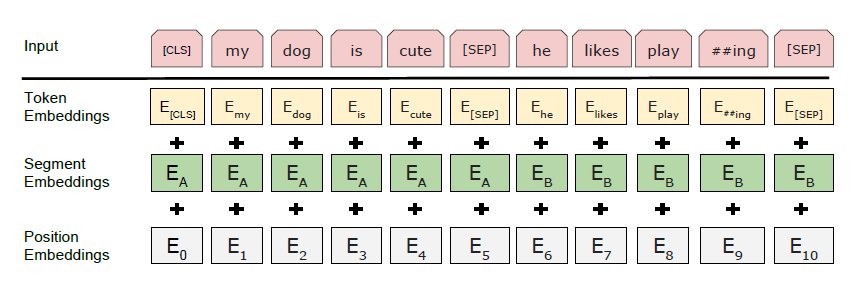

Ïù¥Ìï¥Í∞Ä Ïïà Í∞ÄÏã§ Ïàò ÏûàÎäîÎç∞, Î≤ÑÌä∏ Ïù∏ÌíãÏùÑ Î¨∏Ïû•ÏúºÎ°ú ÏòàÎ•º Îì§Ïñ¥ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.
Ïù∏ÌíãÏùÄ Ï¥ù 2Í∞úÍ∞Ä Îì§Ïñ¥Í∞ëÎãàÎã§

* (ÌÜ†ÌÅ∞) Ï≤´Î≤àÏß∏ Ïù∏ÌíãÏùÄ ÌÜ†ÌÅ∞Ìôî Îêú Í≤ÉÏù¥ Ïù∏Îç±Ïã±ÎêòÏñ¥ Ïà´ÏûêÎ°ú Î≥ÄÌôòÎêú Í≤É

* (ÏÑ∏Í∑∏Î©òÌä∏) ÎëêÎ≤àÏß∏ Ïù∏ÌíãÏùÄ ÏïûÎ¨∏Ïû•Ïù∏ÏßÄ Îí∑Î¨∏Ïû•Ïù∏ÏßÄ ÏïåÎ†§Ï£ºÎäî Ïà´ÏûêÎì§ÏûÖÎãàÎã§. Ïù¥Î≤à ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑúÎäî ÌååÏù∏ÌäúÎãù Í≥ºÏ†ïÏù¥Îùº ÏïûÎ¨∏Ïû• Îí∑Î¨∏Ïû• Íµ¨Î∂ÑÏùÑ ÏïàÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î™®Îëê 0ÏúºÎ°ú ÌïòÏòÄÏäµÎãàÎã§.

* (Ìè¨ÏßÄÏÖò) Îã®Ïñ¥ ÏàúÏÑúÏóê Îî∞ÎùºÏÑú ÏûêÎèôÏúºÎ°ú Î∂ÄÏó¨Îê©ÎãàÎã§.

# Î≤ÑÌä∏Î•º ÌôúÏö©Ìïú Ïä§Ìå∏Î∂ÑÏÑù Î™®Îç∏ ÎßåÎì§Í∏∞
Î≤ÑÌä∏ ÌõàÎ†®ÏùÑ Îπ†Î•¥Í≤å ÌïòÍ∏∞ ÏúÑÌï¥, TPUÎ•º ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§

In [ ]:
# TPU Í∞ùÏ≤¥ ÏßÄÏ†ï
TPU = True
if TPU:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
else:
  pass

In [ ]:
!pip install tensorflow-addons


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 591.0/591.0 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Rectified Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÇ¨Ïö©
import tensorflow_addons as tfa
opt = tfa.optimizers.RectifiedAdam(lr=1.0e-5, weight_decay=0.0025)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from transformers import BertConfig, TFBertModel

def create_malicious_comment_bert():
    # BertConfigÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïª§Ïä§ÌÖÄ ÏÑ§Ï†ï ÏÉùÏÑ±
    config = BertConfig.from_pretrained('bert-large-cased', hidden_dropout_prob=0.1, attention_probs_dropout_prob=0.1)

    # Ïù¥ Ïª§Ïä§ÌÖÄ ÏÑ§Ï†ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î≤ÑÌä∏ pretrained Î™®Îç∏ Î°úÎìú
    model = TFBertModel.from_pretrained('bert-large-cased', config=config)

    # ÌÜ†ÌÅ∞ Ïù∏Ìíã, ÎßàÏä§ÌÅ¨ Ïù∏Ìíã, ÏÑ∏Í∑∏Î®ºÌä∏ Ïù∏Ìíã Ï†ïÏùò
    token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
    mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
    segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')

    # Ïù∏ÌíãÏù¥ [ÌÜ†ÌÅ∞, ÎßàÏä§ÌÅ¨, ÏÑ∏Í∑∏Î®ºÌä∏]Ïù∏ Î™®Îç∏ Ï†ïÏùò
    bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

    bert_outputs = bert_outputs[1]
    malicious_comment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(bert_outputs)
    malicious_comment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], malicious_comment_first)

    malicious_comment_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    return malicious_comment_model

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ±
malicious_comment_model = create_malicious_comment_bert()

# Í∞ÄÏ§ëÏπò Î°úÎìú
malicious_comment_model.load_weights('/content/drive/My Drive/bert/malicious_comment_model_(large)_new1.h5')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# import os
import tensorflow as tf

# TPU ÏÇ¨Ïö© Ïó¨Î∂Ä ÏÑ§Ï†ï
TPU = True

if TPU:
    # TPU ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Î¶¨Ï°∏Î≤Ñ ÏÑ§Ï†ï
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.experimental.TPUStrategy(resolver)

    with strategy.scope():
        malicious_comment_model = create_malicious_comment_bert()
else:
    malicious_comment_model = create_malicious_comment_bert()
# Î™®Îç∏ ÌïôÏäµ
history = malicious_comment_model.fit(train_x, train_y, epochs=5, shuffle=True, batch_size=BATCH_SIZE, validation_data=(val_x, val_y))

# Í≤∞Í≥º ÌèâÍ∞Ä
result = malicious_comment_model.evaluate(test_x, test_y)
print(result)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
1840/1840 [==============================] - 632s 245ms/step - loss: 0.4265 - accuracy: 0.7968 - val_loss: 0.3734 - val_accuracy: 0.8244
Epoch 2/5
1840/1840 [==============================] - 349s 190ms/step - loss: 0.3339 - accuracy: 0.8504 - val_loss: 0.3426 - val_accuracy: 0.8410
Epoch 3/5
1840/1840 [==============================] - 349s 190ms/step - loss: 0.2605 - accuracy: 0.8881 - val_loss: 0.3343 - val_accuracy: 0.8594
Epoch 4/5
1840/1840 [==============================] - 348s 189ms/step - loss: 0.1831 - accuracy: 0.9234 - val_loss: 0.3734 - val_accuracy: 0.8621
Epoch 5/5
395/395 [==============================] - 18s 44ms/step - loss: 0.4193 - accuracy: 0.8657
[0.41928011178970337, 0.8657047748565674]


In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
result = malicious_comment_model.evaluate(test_x, test_y)
print(result)

import random
random_index = random.choice(df.index.tolist())
random_row = df.loc[random_index]

# ÏÑ†ÌÉùÌïú ÌñâÏùò ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌï©ÎãàÎã§
text = random_row['Text']
tokens = tokenizer.tokenize(text)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")

# ÏÑ†ÌÉùÌïú ÌñâÏùò ÌÖçÏä§Ìä∏Î•º Î™®Îç∏Ïóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§
inputs = tokenizer.encode_plus(text, return_tensors='tf', max_length=SEQ_LEN, truncation=True, padding='max_length')

# Î™®Îç∏Î°ú ÏòàÏ∏°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§
prediction = malicious_comment_model.predict([inputs['input_ids'], inputs['attention_mask'], inputs['token_type_ids']])

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§
print(f"Prediction: {prediction}")


395/395 [==============================] - 18s 44ms/step - loss: 0.4193 - accuracy: 0.8657
[0.41928011178970337, 0.8657047748565674]
Original Text: Song EU, cash remaining chips p*ss üëç played cards liberals U.S too. Brexiteers Trump takes nice eh life'll better everyone. URL
Tokens: ['Song', 'EU', ',', 'cash', 'remaining', 'chips', 'p', '*', 's', '##s', '[UNK]', 'played', 'cards', 'liberal', '##s', 'U', '.', 'S', 'too', '.', 'B', '##re', '##xi', '##tee', '##rs', 'Trump', 'takes', 'nice', 'eh', 'life', "'", 'll', 'better', 'everyone', '.', 'U', '##RL']
1/1 [==============================] - 16s 16s/step
Prediction: [[0.59539056]]


In [ ]:
# predict_load_data Ìï®Ïàò Ï†ïÏùò
def predict_load_data(df):
    tokens, masks, segments = [], [], []

    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        text = row['Text']
        token = tokenizer.encode(text, max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)

    return [tokens, masks, segments]

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
test_x = predict_load_data(df_test)

# ÏòàÏ∏°
predictions = malicious_comment_model.predict(test_x)

# Ïã§Ï†ú Í∞í
y_true = df_test['oh_label']

# F1 Score ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(y_true, np.round(predictions,0), digits=3))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12614/12614 [00:03<00:00, 4063.08it/s]


395/395 [==============================] - 38s 79ms/step
              precision    recall  f1-score   support

           0      0.847     0.891     0.868      6276
           1      0.886     0.840     0.863      6338

    accuracy                          0.866     12614
   macro avg      0.867     0.866     0.866     12614
weighted avg      0.867     0.866     0.866     12614



ÌõàÎ†® Î∞è ÏÑ±Îä• Í≤ÄÏ¶ù

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
malicious_comment_model.save_weights('/content/drive/My Drive/bert/malicious_comment_model_new3.h5')


In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []

    for index, row in tqdm(data_df.iterrows(), total=data_df.shape[0]):
        token = tokenizer.encode(row[DATA_COLUMN], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe.copy()  # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÍ≤ΩÌïòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x


In [ ]:
test_x = predict_load_data(df_test)
predictions = malicious_comment_model.predict(test_x)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21755/21755 [00:17<00:00, 1247.98it/s]


680/680 [==============================] - 23s 27ms/step


In [ ]:
test_x

[array([[  101,  1107, 13782, ...,     0,     0,     0],
        [  101,   134,   134, ...,     0,     0,     0],
        [  101,  4819,   171, ...,     0,     0,     0],
        ...,
        [  101,   131,   131, ...,     0,     0,     0],
        [  101,   134,   134, ...,     0,     0,     0],
        [  101,  2993,  1681, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
with strategy.scope():
  preds = malicious_comment_model.predict(test_x)


680/680 [==============================] - 14s 20ms/step


In [ ]:
# Ïä§Ìå∏Ïù¥Î©¥ 1, Ï†ïÏÉÅÏù¥Î©¥ 0 Ï∂úÎ†•
preds

array([[9.0224874e-01],
       [1.1320734e-01],
       [9.9945784e-01],
       ...,
       [9.9935794e-01],
       [2.1085143e-04],
       [9.9695939e-01]], dtype=float32)

Ïö∞Î¶¨Í∞Ä ÌõàÎ†®Ìïú Î™®Îç∏ÏùÑ F1 SCOREÎ•º Î∞îÌÉïÏúºÎ°ú ÏÑ±Îä• Ï∏°Ï†ï
F1 SCOREÎäî precisionÍ≥º recallÏùÑ Í∞ÄÏ§ëÌèâÍ∑†ÌïòÏó¨ Í≥ÑÏÇ∞Ìï©ÎãàÎã§
recallÏùÄ (Î™®Îç∏Ïù¥ TRUEÎùºÍ≥† ÌåêÏ†ïÌïú Í≤ÉÏùò Ïà´Ïûê)/(Ï†ÑÏ≤¥ TRUEÏùò Ïà´Ïûê)
precisionÏùÄ (ÏßÑÏßú TRUE) / (Î™®Îç∏Ïù¥ TRUEÎùºÍ≥† ÌåêÏ†ïÌïú Í≤ÉÏùò Ïà´Ïûê)

In [ ]:
from sklearn.metrics import classification_report
y_true = df_test['oh_label']
# F1 Score ÌôïÏù∏
print(classification_report(y_true, np.round(preds,0), digits=3))

NameError: ignored

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú Ïã§ÏäµÌïòÍ∏∞

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, truncation=True, padding='max_length')

    num_zeros = token.count(0)
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def malicious_comment_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = malicious_comment_model.predict(data_x)
    predict_value = np.ravel(predict)
    predict_answer = np.round(predict_value).astype(int).item()  # ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ

    if predict_answer == 1:  # ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ
        print("(rate : %.2f) Malicious comment." % predict_value)
    elif predict_answer == 0:  # ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ
        print("(rate : %.2f) Non-malicious comment." % predict_value)




In [ ]:
def predict_random_data(df):
    random_index = random.choice(df.index.tolist())
    random_text = df.loc[random_index, 'Text']
    prediction = malicious_comment_evaluation_predict(random_text)
    return random_text, prediction
random_text, prediction = predict_random_data(df)
print("Text:", random_text)
print("Prediction:", prediction)


1/1 [==============================] - 1s 636ms/step
(rate : 0.05) Non-malicious comment.
Text: PKK terrorist list Peshmerga.
Prediction: None


In [ ]:
malicious_comment_evaluation_predict("I'm sexist")


1/1 [==============================] - 1s 532ms/step
(rate : 0.96) Malicious comment.


In [ ]:
malicious_comment_evaluation_predict("You fuck your dad")


1/1 [==============================] - 1s 555ms/step
(rate : 0.83) Malicious comment.


In [ ]:
malicious_comment_evaluation_predict("fuck your dad")

1/1 [==============================] - 1s 514ms/step
(rate : 0.38) Non-malicious comment.


In [ ]:
malicious_comment_evaluation_predict("hi")

1/1 [==============================] - 1s 531ms/step
(rate : 0.05) Non-malicious comment.


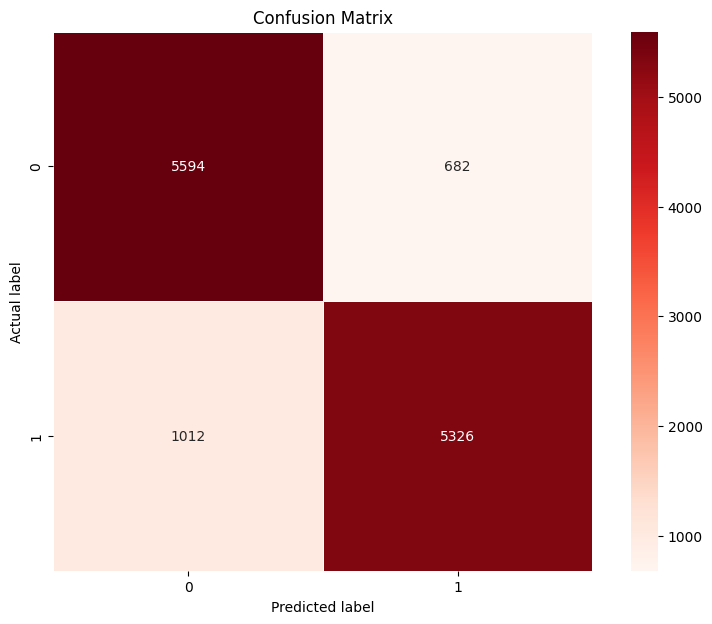

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicted values
y_pred = np.round(predictions, 0)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

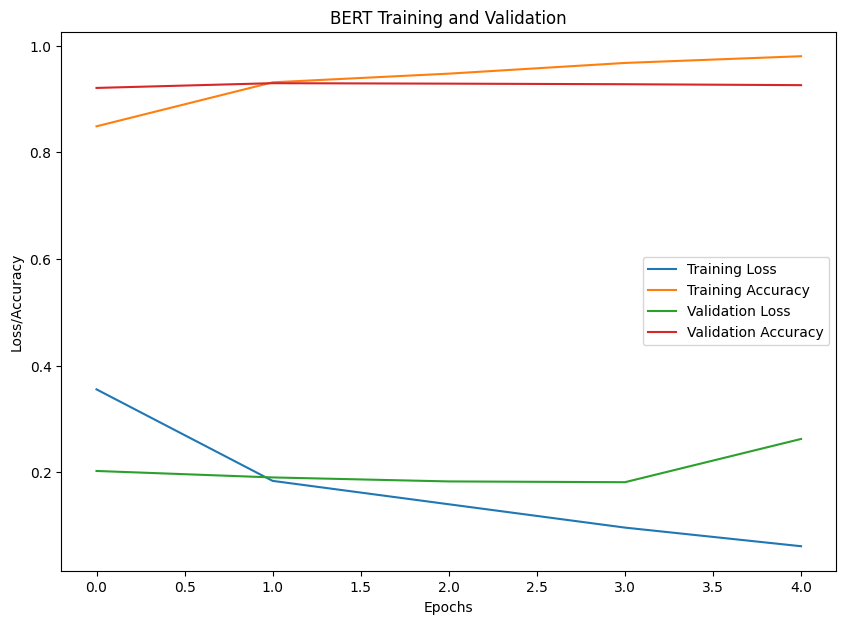

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")

plt.title('BERT Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()
